<a href="https://colab.research.google.com/github/py-qn/ITI/blob/main/optimization/Practical_Session_4_Adagrad_RMSProp_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
x = np.linspace(0,20 ,50, endpoint=True).reshape(50,1)
y = -1 * x + 2
ones = np.ones((x.shape[0],1))
x_new =np.concatenate((ones,x),axis=1)

In [ ]:
x

array([[ 0.        ],
       [ 0.40816327],
       [ 0.81632653],
       [ 1.2244898 ],
       [ 1.63265306],
       [ 2.04081633],
       [ 2.44897959],
       [ 2.85714286],
       [ 3.26530612],
       [ 3.67346939],
       [ 4.08163265],
       [ 4.48979592],
       [ 4.89795918],
       [ 5.30612245],
       [ 5.71428571],
       [ 6.12244898],
       [ 6.53061224],
       [ 6.93877551],
       [ 7.34693878],
       [ 7.75510204],
       [ 8.16326531],
       [ 8.57142857],
       [ 8.97959184],
       [ 9.3877551 ],
       [ 9.79591837],
       [10.20408163],
       [10.6122449 ],
       [11.02040816],
       [11.42857143],
       [11.83673469],
       [12.24489796],
       [12.65306122],
       [13.06122449],
       [13.46938776],
       [13.87755102],
       [14.28571429],
       [14.69387755],
       [15.10204082],
       [15.51020408],
       [15.91836735],
       [16.32653061],
       [16.73469388],
       [17.14285714],
       [17.55102041],
       [17.95918367],
       [18

#### Plot your data points. 

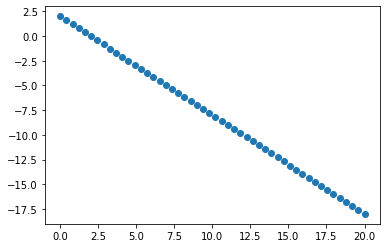

In [ ]:
plt.scatter(x,y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [ ]:
def GD_Adagrad(x,y,lr = 0.4,numOfiteration = 1500,stop_criteria = 0.0001, epsilon = .000001):
    m = len(y)
    j=[np.inf]
    theta =np.array([[0],[0]])
    theta0_hist = []
    theta1_hist = []
    hypothesis_history = []
    prev_v = 0
    for i in range(numOfiteration):
    
        grad0 = (1 / m) * sum( (np.dot(x, theta) - y))
        grad1 = (1 / m) * sum( (np.dot(x, theta) - y)*  x[:,1].reshape(m,1))
        gradiant = np.array([[grad0],[grad1]]).reshape(2,1)

        v_t =  prev_v  + (gradiant) **2
        ada_lr = lr /(np.sqrt(v_t)+epsilon)
        theta  = theta - ada_lr * gradiant

        hypothesis = np.dot(x,theta)
        hypothesis_history.append(hypothesis)
        error = np.sum((hypothesis - y)**2) / (2 *m)
        theta0_hist.append(theta[0])
        theta1_hist.append(theta[1])
        j.append(error)
        prev_v = v_t
        if abs(j[-1] - j[-2]) < stop_criteria:
                break
                

    j.pop(0)
    return theta,j , theta0_hist , theta1_hist, hypothesis_history

In [ ]:
theta , lossFunction ,th0h , th1h,hypothesis_history = GD_Adagrad(x_new,y)

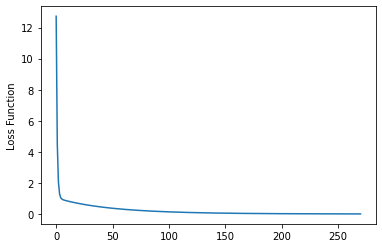

In [ ]:
plt.plot(lossFunction)
plt.ylabel("Loss Function")
plt.show()

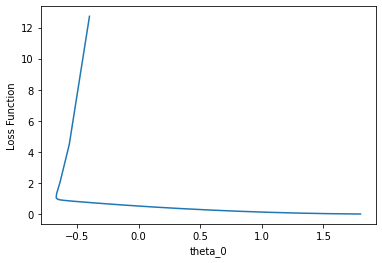

In [ ]:
plt.plot(th0h,lossFunction)
plt.ylabel("Loss Function")
plt.xlabel("theta_0")
plt.show()

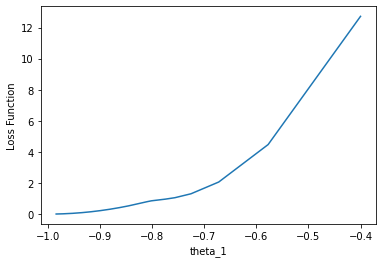

In [ ]:
plt.plot(th1h,lossFunction)
plt.ylabel("Loss Function")
plt.xlabel("theta_1")
plt.show()

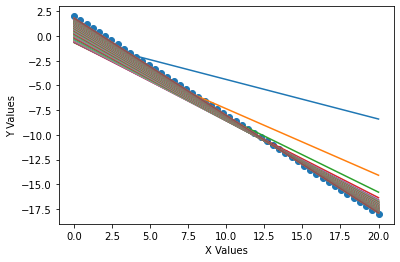

In [ ]:
plt.scatter(x,y)
for i in range(0,len(hypothesis_history),2):
    plt.plot(x,hypothesis_history[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

In [ ]:
y_predm= theta[0] + theta[1] *x

In [ ]:
from sklearn.metrics import r2_score

print (r2_score(y,y_predm) *100 , "%")

99.97047016495067 %


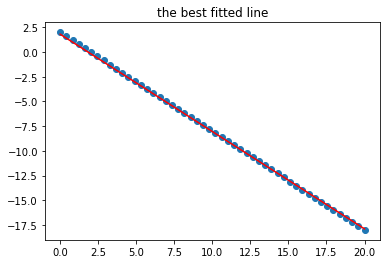

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predm,'r-')
plt.title('the best fitted line')
plt.show()

### Trial 2

In [ ]:
theta , lossFunction ,th0h , th1h,hypothesis_history = GD_Adagrad(x_new,y,lr = 0.1,numOfiteration = 2000,stop_criteria = 0.000001, epsilon = .000001)

In [ ]:
y_pred2= theta[0] + theta[1] *x

In [ ]:
print (r2_score(y,y_pred2) *100 , "%")

99.91696088243494 %


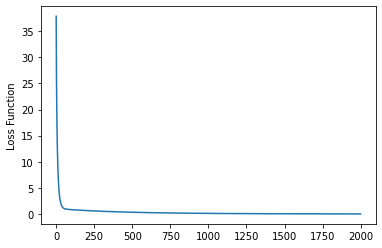

In [ ]:
plt.plot(lossFunction)
plt.ylabel("Loss Function")
plt.show()

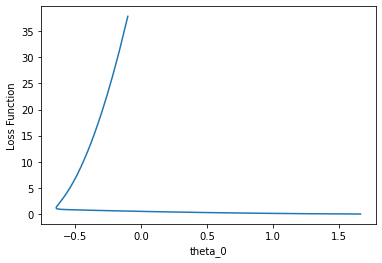

In [ ]:
plt.plot(th0h,lossFunction)
plt.ylabel("Loss Function")
plt.xlabel("theta_0")
plt.show()

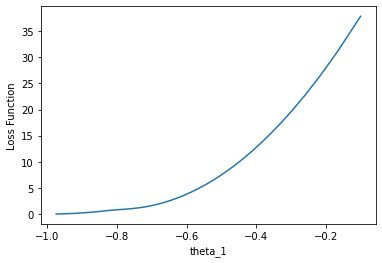

In [ ]:
plt.plot(th1h,lossFunction)
plt.ylabel("Loss Function")
plt.xlabel("theta_1")
plt.show()

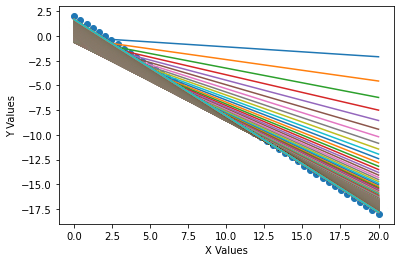

In [ ]:
plt.scatter(x,y)
for i in range(0,len(hypothesis_history),2):
    plt.plot(x,hypothesis_history[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

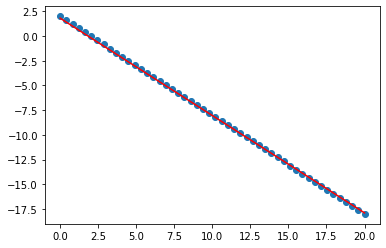

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predm,'r-')
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [ ]:
def GD_RMSProp(x,y,lr = .01,numOfiteration = 1000,stop_criteria = 0.00001,epsilon = .000001,bita = .9 ):
    m = len(y)
    j=[np.inf]
    theta =np.array([[0],[0]])
    theta0_hist = []
    theta1_hist = []
    hypothesis_history = []
    prev_v = 0
    for i in range(numOfiteration):
    
        grad0 = (1 / m) * sum( (np.dot(x, theta) - y))
        grad1 = (1 / m) * sum( (np.dot(x, theta) - y)*  x[:,1].reshape(m,1))

        v_t = bita * prev_v  +  (1-bita) * (np.array([[grad0],[grad1]]).reshape(2,1)) **2
        ada_lr = (lr /(np.sqrt((v_t)) + epsilon)) 
        theta  = theta - ada_lr * np.array([[grad0],[grad1]]).reshape(2,1)

        hypothesis = np.dot(x,theta)
        hypothesis_history.append(hypothesis)
        error = np.sum((hypothesis - y)**2) / (2 *m)
        theta0_hist.append(theta[0])
        theta1_hist.append(theta[1])
        j.append(error)
        prev_v = v_t
        if abs(j[-1] - j[-2]) < stop_criteria:
                break
                

    
    j.pop(0)
    return theta,j , theta0_hist , theta1_hist,hypothesis_history

In [ ]:
thetam , jm ,th0h , th1h,hypothesis_history = GD_RMSProp(x_new,y)

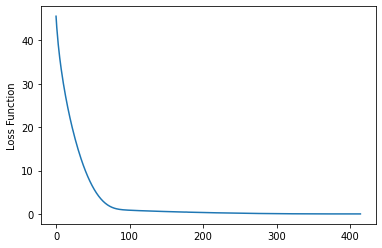

In [ ]:
plt.plot(jm)
plt.ylabel("Loss Function")
plt.show()

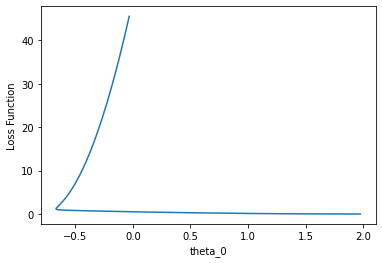

In [ ]:
plt.plot(th0h,jm)
plt.ylabel("Loss Function")
plt.xlabel("theta_0")
plt.show()

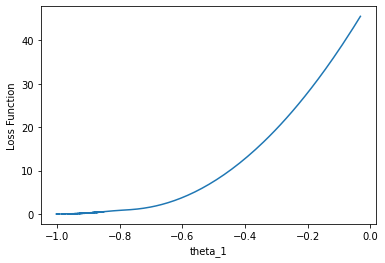

In [ ]:
plt.plot(th1h,jm)
plt.ylabel("Loss Function")
plt.xlabel("theta_1")
plt.show()

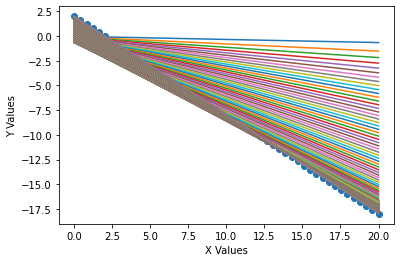

In [ ]:
plt.scatter(x,y)
for i in range(0,len(hypothesis_history),2):
    plt.plot(x,hypothesis_history[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

In [ ]:
y_pred= thetam[0] + thetam[1] *x

In [ ]:
print (r2_score(y,y_pred) *100 , "%")

99.98810406665629 %


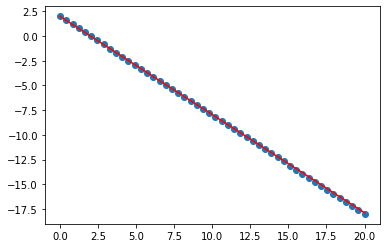

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()

### Trial 2

In [ ]:
thetam , jm ,th0h , th1h,hypothesis_history = GD_RMSProp(x_new,y,lr = .05,numOfiteration = 1000,stop_criteria = 0.00001,epsilon = .000001,bita = .85 )

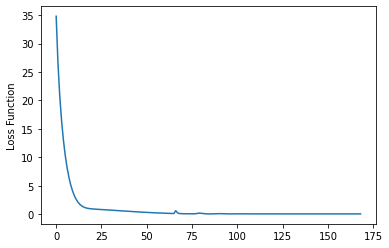

In [ ]:
plt.plot(jm)
plt.ylabel("Loss Function")
plt.show()

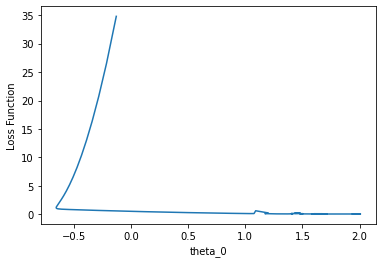

In [ ]:
plt.plot(th0h,jm)
plt.ylabel("Loss Function")
plt.xlabel("theta_0")
plt.show()

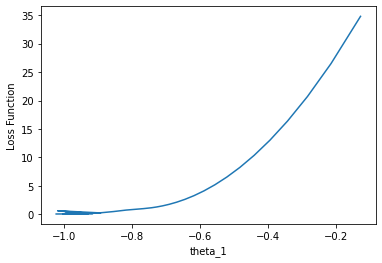

In [ ]:
plt.plot(th1h,jm)
plt.ylabel("Loss Function")
plt.xlabel("theta_1")
plt.show()

In [ ]:
y_pred= thetam[0] + thetam[1] *x

In [ ]:
print (r2_score(y,y_pred) *100 , "%")

99.71907276761462 %


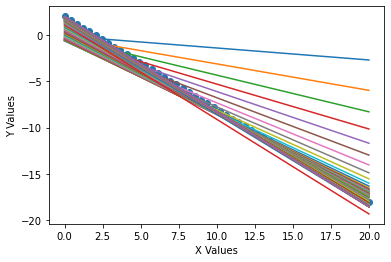

In [ ]:
plt.scatter(x,y)
for i in range(0,len(hypothesis_history),2):
    plt.plot(x,hypothesis_history[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

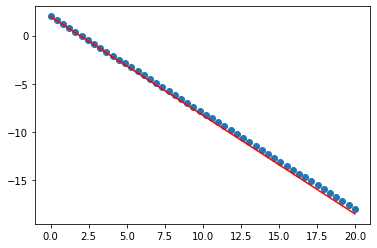

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [ ]:
def GD_Adam(x,y,lr = .05,numOfiteration = 200,stop_criteria = 0.00001,epsilon = .0000001,bita1 = .5,bita2 = .8
 ):
    m = len(y)
    j=[np.inf]
    theta =np.array([[0],[0]])
    theta0_hist = []
    theta1_hist = []
    hypothesis_history = []
    prev_v = 0
    prev_m = 0
    for i in range(1,numOfiteration):
    
        grad0 = (1 / m) * sum( (np.dot(x, theta) - y))
        grad1 = (1 / m) * sum( (np.dot(x, theta) - y)*  x[:,1].reshape(m,1))
        gradiant = np.array([[grad0],[grad1]]).reshape(2,1)
        
        m_t = bita1 * prev_m + (1-bita1) * gradiant
        v_t = bita2 * prev_v  +(1-bita2) * ((gradiant) **2)
         
        m_t = m_t / (1-bita1**i)
        v_t = v_t / (1-bita2**i)
    
        ada_lr = (lr /(np.sqrt(v_t) + epsilon)) 
        theta  = theta - ada_lr * m_t

        hypothesis = np.dot(x,theta)
        hypothesis_history.append(hypothesis)
        error = np.sum((hypothesis - y)**2) / (2 *m)
        theta0_hist.append(theta[0])
        theta1_hist.append(theta[1])
        j.append(error)
        prev_v = v_t
        prev_m = m_t
        if abs(j[-1] - j[-2]) < stop_criteria:
                break
                

    j.pop(0)
    return theta,j , theta0_hist , theta1_hist,hypothesis_history

In [ ]:
thetaa , jm ,th0h , th1h,hypothesis_history = GD_Adam(x_new,y)


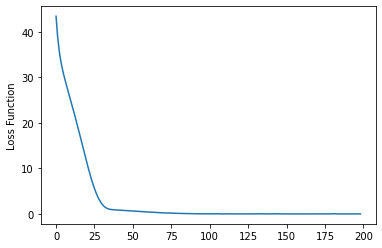

In [ ]:
plt.plot(jm)
plt.ylabel("Loss Function")
plt.show()

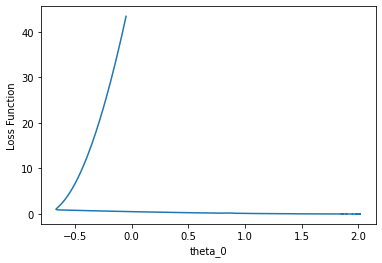

In [ ]:
plt.plot(th0h,jm)
plt.ylabel("Loss Function")
plt.xlabel("theta_0")
plt.show()

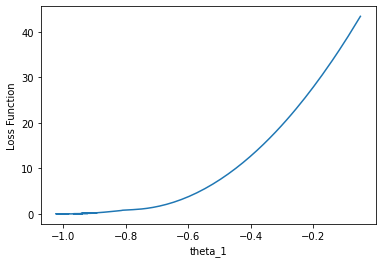

In [ ]:
plt.plot(th1h,jm)
plt.ylabel("Loss Function")
plt.xlabel("theta_1")
plt.show()

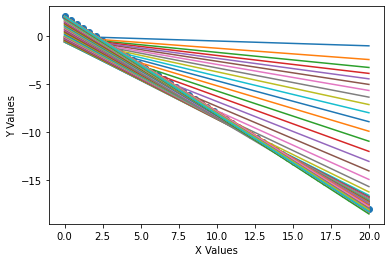

In [ ]:
plt.scatter(x,y)
for i in range(0,len(hypothesis_history),2):
    plt.plot(x,hypothesis_history[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

In [ ]:
y_pred= thetaa[0] + thetaa[1] *x

In [ ]:
print (r2_score(y,y_pred) *100 , "%")

99.94980471762001 %


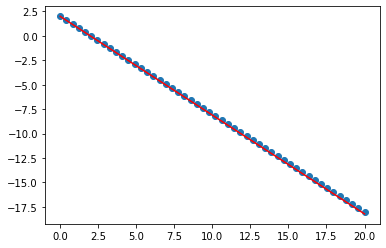

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()

### Trial 2

In [ ]:
thetaa , jm ,th0h , th1h,hypothesis_history = GD_Adam(x_new,y,lr = .01,numOfiteration = 1000,stop_criteria = 0.000001,epsilon = .0000001,bita1 = .7,bita2 = .9)


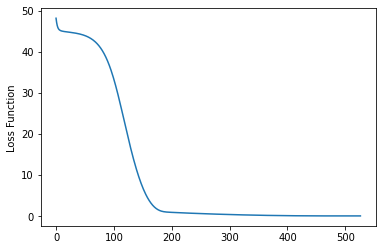

In [ ]:
plt.plot(jm)
plt.ylabel("Loss Function")
plt.show()

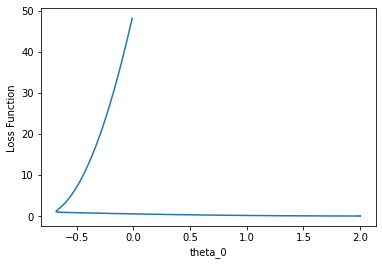

In [ ]:
plt.plot(th0h,jm)
plt.ylabel("Loss Function")
plt.xlabel("theta_0")
plt.show()

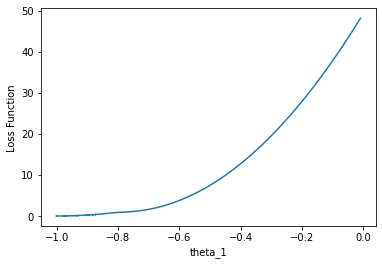

In [ ]:
plt.plot(th1h,jm)
plt.ylabel("Loss Function")
plt.xlabel("theta_1")
plt.show()

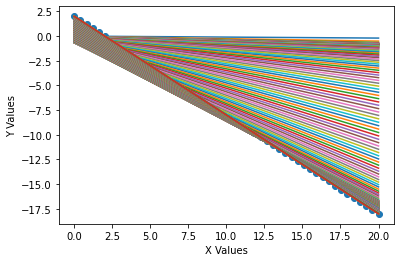

In [ ]:
plt.scatter(x,y)
for i in range(0,len(hypothesis_history),2):
    plt.plot(x,hypothesis_history[i])
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

In [ ]:
y_pred= thetaa[0] + thetaa[1] *x

In [ ]:
print (r2_score(y,y_pred) *100 , "%")

99.99981564251372 %


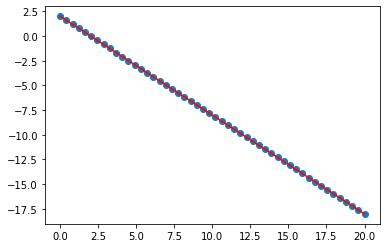

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()

### Comparing for the same parameters 

## Adagrad

In [ ]:
theta , lossFunction ,th0h , th1h,hypothesis_history1 = GD_Adagrad(x_new,y,lr = 0.1,numOfiteration = 2000,stop_criteria = 0.000001, epsilon = .000001)


In [ ]:
y_pred= theta[0] + theta[1] *x
print (r2_score(y,y_pred) *100 , "%")

99.91696088243494 %


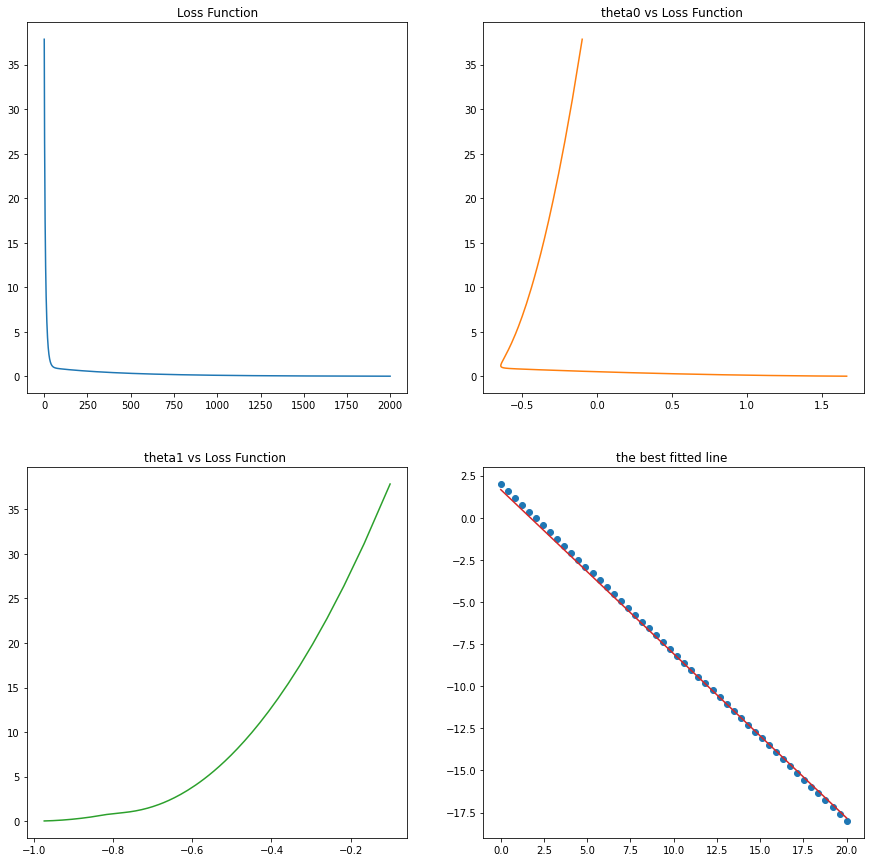

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))

axs[0, 0].plot(lossFunction)
axs[0, 0].set_title("Loss Function")

axs[0, 1].plot(th0h,lossFunction, 'tab:orange')
axs[0, 1].set_title("theta0 vs Loss Function ")

axs[1, 0].plot(th1h,lossFunction, 'tab:green')
axs[1,0].set_title("theta1 vs Loss Function ")

axs[1, 1].scatter(x, y)
axs[1, 1].plot(x, y_pred,'tab:red')
axs[1,1].set_title("the best fitted line ")

plt.show()

### RMSProp

In [ ]:
thetam , jm ,th0h , th1h,hypothesis_history2 = GD_RMSProp(x_new,y,lr = .1,numOfiteration = 2000,stop_criteria = 0.00001,epsilon = .000001,bita = .85 )


In [ ]:
y_pred= thetam[0] + thetam[1] *x
print (r2_score(y,y_pred) *100 , "%")

98.87876396197368 %


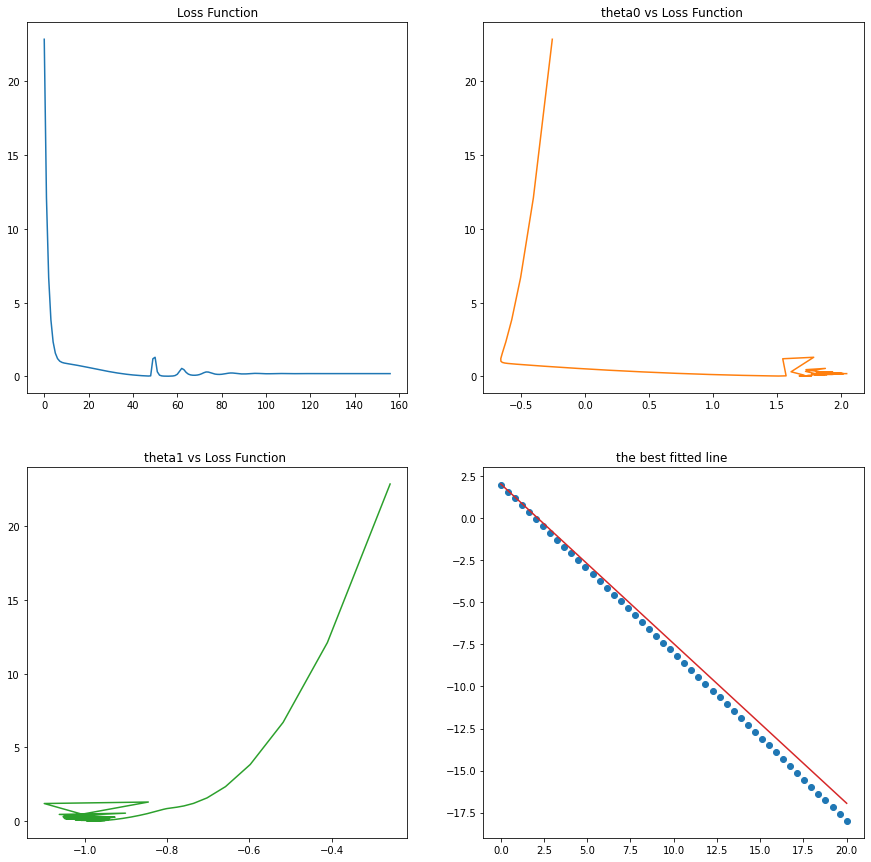

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))

axs[0, 0].plot(jm)
axs[0, 0].set_title("Loss Function")

axs[0, 1].plot(th0h,jm, 'tab:orange')
axs[0, 1].set_title("theta0 vs Loss Function ")

axs[1, 0].plot(th1h,jm, 'tab:green')
axs[1,0].set_title("theta1 vs Loss Function ")

axs[1, 1].scatter(x, y)
axs[1, 1].plot(x, y_pred,'tab:red')
axs[1,1].set_title("the best fitted line ")

plt.show()

### Adam

In [ ]:
thetaa , jm ,th0h , th1h,hypothesis_history3 = GD_Adam(x_new,y,lr = .1,numOfiteration = 2000,stop_criteria = 0.000001,epsilon = .0000001,bita1 = .7,bita2 = .85)


In [ ]:
y_pred= thetaa[0] + thetaa[1] *x
print (r2_score(y,y_pred) *100 , "%")

99.99997143437032 %


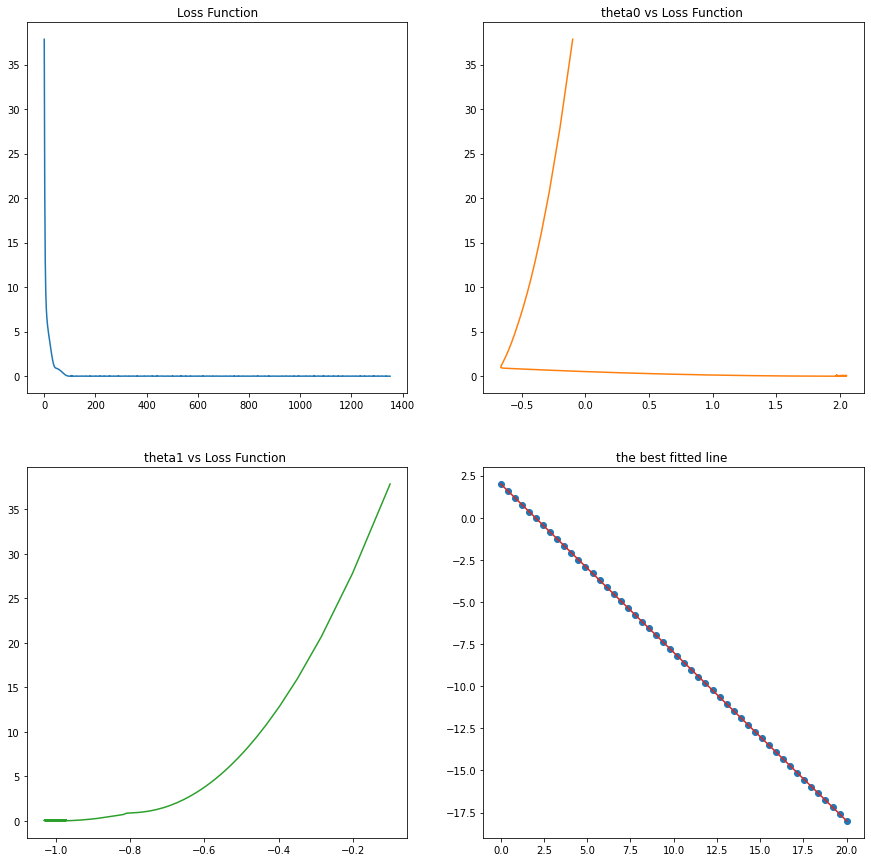

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))

axs[0, 0].plot(jm)
axs[0, 0].set_title("Loss Function")

axs[0, 1].plot(th0h,jm, 'tab:orange')
axs[0, 1].set_title("theta0 vs Loss Function ")

axs[1, 0].plot(th1h,jm, 'tab:green')
axs[1, 0].set_title("theta1 vs Loss Function ")

axs[1, 1].scatter(x, y)
axs[1, 1].plot( x, y_pred, 'tab:red')
axs[1, 1].set_title("the best fitted line ")

plt.show()

## Congratulations 
![image.png](attachment:image.png)